# Arabic Tweets Sentiment Anaylsis

## Introduction

This dataset we collected in April 2019 by an company. It contains 58K Arabic tweets annotated in positive and negative labels, The company collected this dataset to provide Arabic sentiment corpus for the research the comapny doing to investigate deep learning approaches for Arabic sentiment analysis. The dataset is balanced and collected using positive and negative emojis lexicon.

## Exploring and downloading the Text data files

In [1]:
import pandas as pd

In [2]:
tweets_data_negative = pd.read_csv('/content/train_Arabic_tweets_negative_20190413.tsv',sep='\t',header=None, encoding='utf-8')
tweets_data_positive = pd.read_csv('/content/train_Arabic_tweets_positive_20190413.tsv',sep='\t',header=None, encoding='utf-8')

In [3]:
tweets_data_negative.head()

,0,1
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔


In [4]:
tweets_data_positive.head()

,0,1
0,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...


we see that there is two labels "neg" and "pos" in the class seprated in two dataframes so i said i work on them together in one dataframe so i will concate them for better exploration on the data.

In [5]:
fulldf = pd.concat([tweets_data_negative,tweets_data_positive], ignore_index=True)

In [6]:
fulldf.head()

,0,1
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔


In [7]:
fulldf.describe()

,0,1
count,45275,45275
unique,2,29449
top,pos,بمناسبة فوز الهلال .. 💙 سحب على آيفون XR📱 رتوي...
freq,22761,349


In [8]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45275 entries, 0 to 45274
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       45275 non-null  object
 1   1       45275 non-null  object
dtypes: object(2)
memory usage: 707.5+ KB


In [9]:
fulldf.columns

Int64Index([0, 1], dtype='int64')

In [10]:
fulldf.columns = ['class','Tweets']

In [11]:
fulldf.columns


Index(['class', 'Tweets'], dtype='object')

In [12]:
fulldf.head()

,class,Tweets
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔


we need to make sure that we have both neg and pos rows too 

In [13]:
fulldf['class'].unique()

array(['neg', 'pos'], dtype=object)

Checking for nulls:

In [14]:
fulldf.isna().sum()

class     0
Tweets    0
dtype: int64

# Data Exploration and cleaning

first lets import the libraries we will need in this project.

First lets install our graphics tools from python like:
 
*    plotly: plotly.py is an interactive, open-source, and browser-based graphing library for Python https://github.com/plotly/plotly.py

*   cufflinks: This library binds the power of plotly with the flexibility of pandas for easy plotting. https://github.com/santosjorge/cufflinks



In [15]:
!pip install plotly

In [16]:
!pip install cufflinks

now the rest of the important libraries:

In [17]:
import pandas as pd
import numpy as np
from collections import Counter
import nltk
import pandas as pd
import re as regex
import numpy as np
import plotly
from plotly import graph_objs
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly
import cufflinks as cf
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

now we need to clean the tweets texts and do some tokenization and stemming and maybe adding more feauters to the dataframe

Lets do some visualization for the distrbution of the target class:

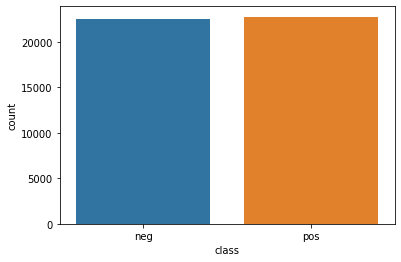

In [18]:
sns.countplot(x='class',data=fulldf)

Now lets start with cleaning the data:

In [19]:
import string
punctuatuions = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation
def clean_tweets(tweet):
    #remove punctuatuions
    translator = str.maketrans('','',punctuatuions)
    tweet = tweet.translate(translator)
    
    #remove longation
    tweet = re.sub("[إأآا]", "ا", tweet)
    tweet = re.sub("ى", "ي", tweet)
    tweet = re.sub("ؤ", "ء", tweet)
    tweet = re.sub("ئ", "ء", tweet)
    tweet = re.sub("ة", "ه", tweet)
    tweet = re.sub("گ", "ك", tweet)
    
    # remove URL
    tweet = re.sub('http\S+\s*', ' ', tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)
    
    # remove special characters 
    tweet = re.sub("@[ا-ي0-9]+", " ", tweet)
    tweet = re.sub("[أ-ي]#+", " ", tweet)
    tweet = re.sub("#[أ-ي]+", " ", tweet)
    
    # remove Numbers
    tweet = re.sub('^[\u0621-\u064A\u0660-\u0669 ]+$', '', tweet)
    tweet = re.sub('\.+', '', tweet)
    tweet = re.sub(':', '', tweet)
    tweet = re.sub('!', '', tweet)
    tweet = re.sub('،','',tweet)
    tweet = re.sub('-','',tweet)
    tweet = re.sub('_','',tweet)
    return tweet

Now lets apply this function to clean the data:

In [20]:
fulldf['Tweets'] = fulldf['Tweets'].apply(clean_tweets)

Now lets see how the first 5 rows looks like:

In [21]:
fulldf['Tweets'].head()

0    اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1    توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2    الاهليالهلال اكتب توقعك لنتيجه لقاء الهلال وال...
3    نعمه المضادات الحيويه  تضع قطره💧مضاد بنسلين عل...
4                               الدودو جايه تكمل علي 💔
Name: Tweets, dtype: object

# Tokenization And Stemming

## Tokenization

In [22]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import  word_tokenize
tt = TweetTokenizer()
fulldf['Tweets'].apply(tt.tokenize)

0        [اعترف, ان, بتس, كانو, شوي, شوي, يجيبو, راسي, ...
1        [توقعت, اذا, جات, داريا, بشوفهم, كاملين, بس, ل...
2        [الاهليالهلال, اكتب, توقعك, لنتيجه, لقاء, الهل...
3        [نعمه, المضادات, الحيويه, تضع, قطره, 💧, مضاد, ...
4                             [الدودو, جايه, تكمل, علي, 💔]
                               ...                        
45270    [السحب, الليله, علي, الايفون, رتويت, للمرفقه, ...
45271    [😂, لابسه, احمر, ليه, يا, ست, انتي, ايه, المنا...
45272    [كلاام, جمييل, تستاهلمن, احبه, الله, جعل, محبت...
45273               [الطف, صوره, ممكن, تعبر, عن, رمضان, 💙]
45274    [🌸, قال, الامامابنالقيم, رحمه, الله, تعالي, فا...
Name: Tweets, Length: 45275, dtype: object

## Stemming

In [23]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()

So what is stemming for?
  Its a normilization method for basically to normalize words and shorten the lookup because many vartions of words carry the same meaning other then when tense is involed.

In [24]:
def tokenize(text):
  return word_tokenize(text)

def stemming(words):
  stem_words = []
  for w in words:
    w = ps.stem(w)
    stem_words.append(w)
    return stem_words

Now lets apply the tokenize function on the data:

In [25]:
fulldf['text'] = fulldf['Tweets'].apply(tokenize)

And now stemming function:

In [26]:
fulldf['Tokenized'] = fulldf['Tweets'].apply(stemming)

In [27]:
fulldf.head()

,class,Tweets,text,Tokenized
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...,"[اعترف, ان, بتس, كانو, شوي, شوي, يجيبو, راسي, ...",[ا]
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...,"[توقعت, اذا, جات, داريا, بشوفهم, كاملين, بس, ل...",[ت]
2,neg,الاهليالهلال اكتب توقعك لنتيجه لقاء الهلال وال...,"[الاهليالهلال, اكتب, توقعك, لنتيجه, لقاء, الهل...",[ا]
3,neg,نعمه المضادات الحيويه تضع قطره💧مضاد بنسلين عل...,"[نعمه, المضادات, الحيويه, تضع, قطره💧مضاد, بنسل...",[ن]
4,neg,الدودو جايه تكمل علي 💔,"[الدودو, جايه, تكمل, علي, 💔]",[ا]


We can see that we have now two new featuers text that has been tokenized in the text featuer and the stemming in the tokeinzed featuer

Now lets see the lenght of rows in this dataset

In [28]:
len(fulldf)

45275

# Wordlist

In [29]:
words = Counter()
for idx in fulldf.index:
  words.update(fulldf.loc[idx,"text"])

In [30]:
words.most_common(10)

[('من', 8014),
 ('الله', 5907),
 ('في', 5686),
 ('💔', 5027),
 ('علي', 4531),
 ('و', 3975),
 ('لا', 3410),
 ('ما', 3126),
 ('ان', 2862),
 ('😂', 2814)]

Stop words:

In [31]:
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words("arabic")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
stopwords

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

lets have our whitelist:

In [33]:
whitelist= ['لأن','لئن']
whitelist

['لأن', 'لئن']

In [34]:
for idx,stop_word in enumerate(stopwords):
  if stop_word not in whitelist:
    del words[stop_word]
words.most_common(10)

[('الله', 5907),
 ('💔', 5027),
 ('علي', 4531),
 ('و', 3975),
 ('ان', 2862),
 ('😂', 2814),
 ('💙', 2542),
 ('انا', 2101),
 ('😭', 1904),
 ('صباح', 1876)]

In [35]:
def word_list(processed_data):
    #print(processed_data)
    min_occurrences=3 
    max_occurences=500 
    stopwords=nltk.corpus.stopwords.words("arabic")
    whitelist = ['لأن','لئن']
    wordlist = []
    
    whitelist = whitelist if whitelist is None else whitelist
   # print(whitelist)
    words = Counter()
    for idx in processed_data.index:
        words.update(processed_data.loc[idx, "text"])

    for idx, stop_word in enumerate(stopwords):
        if stop_word not in whitelist:
            del words[stop_word]
    #print(words)

    word_df = pd.DataFrame(data={"word": [k for k, v in words.most_common() if min_occurrences < v < max_occurences],
                                 "occurrences": [v for k, v in words.most_common() if min_occurrences < v < max_occurences]},
                           columns=["word", "occurrences"])
    #print(word_df)
    word_df.to_csv("wordlist.csv", index_label="idx")
    wordlist = [k for k, v in words.most_common() if min_occurrences < v < max_occurences]
    #print(wordlist)

In [36]:
word_list(fulldf)

In [37]:
words = pd.read_csv("wordlist.csv")
words.head()

,idx,word,occurrences
0,0,واحد,492
1,1,بمناسبه,490
2,2,ال,484
3,3,💪,481
4,4,بالله,477


* Lets do some visualizations:

# WordMap:

In [38]:
# !pip install wordcloud

In [39]:
!pip install ar_wordcloud

     |████████████████████████████████| 368kB 11.8MB/s 
  Created wheel for arabic-reshaper: filename=arabic_reshaper-2.1.1-cp36-none-any.whl size=16504 sha256=7b741c152e1f979c424a3a962434e3e40e025302070bcecfab07ef5a3186de17
  Stored in directory: /root/.cache/pip/wheels/62/52/d8/bd0dcbf00f9e77e3bd0184285ed77dfa9c475dac494a5353d1
Successfully built arabic-reshaper
  Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


downloading and unzipping arabic font: /usr/local/lib/python3.6/dist-packages/ar_wordcloud/fonts/NotoNaskhArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.6/dist-packages/ar_wordcloud/fonts/NotoSansArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.6/dist-packages/ar_wordcloud/fonts/NotoKufiArabic-unhinted.zip .. 


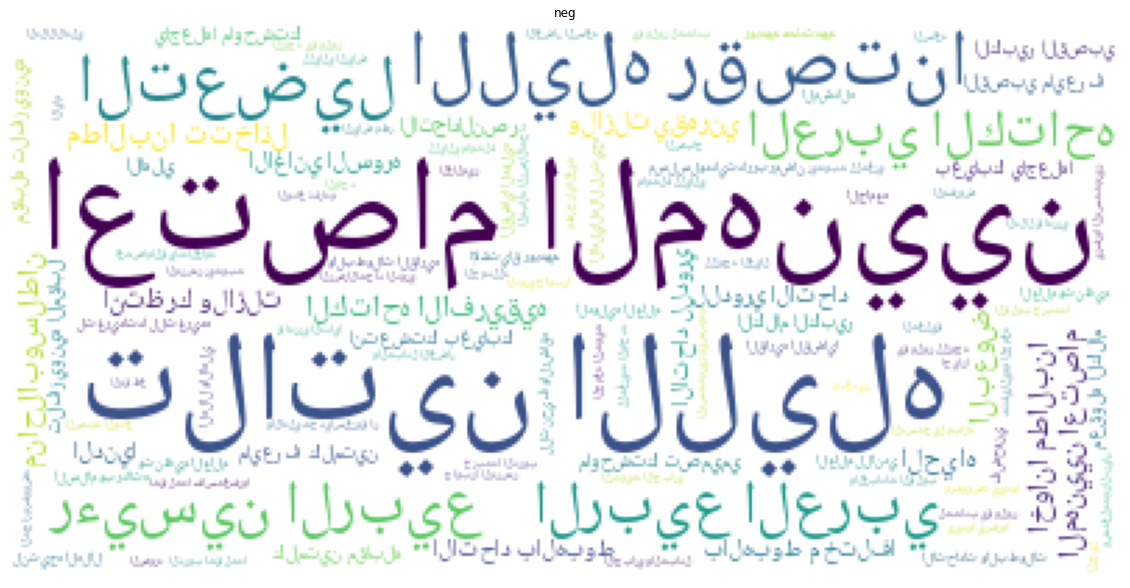

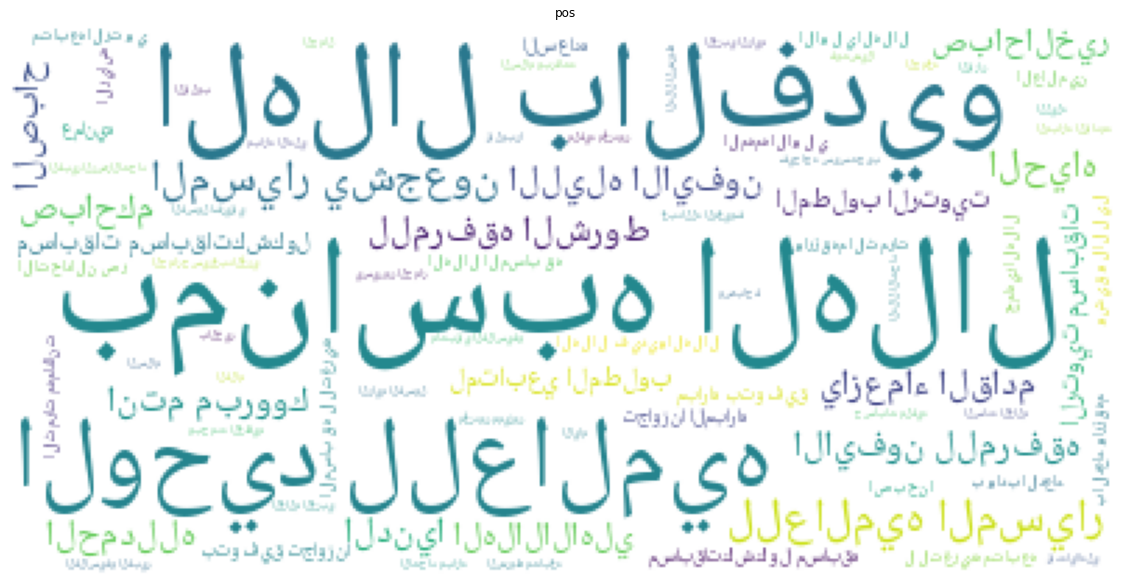

In [40]:
from ar_wordcloud import ArabicWordCloud
from wordcloud import WordCloud
for emotion in fulldf['class'].unique():
  #emotion='joy'
  if emotion=='😂':
    continue
  Data=' '.join(fulldf[fulldf['class']==emotion]['Tweets'].values)
  stops=['الله','و','إذ','إذا','إذما','إذن' 'أف','أقل','صباح']
  tokens =[word.lower() for word in Data.split() if len(word)>5 and word.lower() not in stops ]
  Data=' '.join(tokens)


  wordcloud = ArabicWordCloud(background_color="white").generate(Data)
  plt.figure(figsize=(20,20))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(emotion)
  plt.show()

In [41]:
fulldf['Tweets_len'] = fulldf['text'].apply(len)

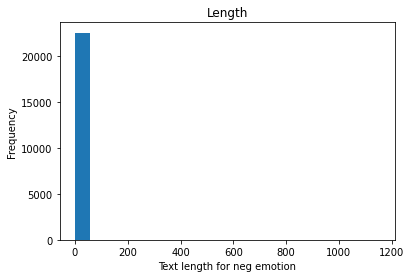

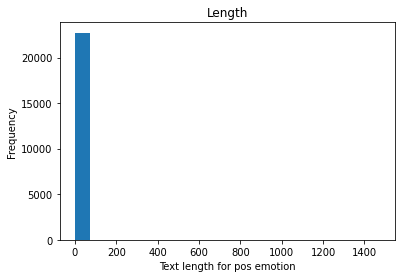

In [42]:
for emotion in fulldf['class'].unique():
  fulldf[fulldf['class']==emotion]['Tweets_len'].plot(
      kind='hist',
      bins=20,
      title='Length')
  plt.xlabel(f'Text length for {emotion} emotion')
  plt.show()
  

* Lets get into more analysis

In [45]:
## Emoticon Detector class

class EmoticonDetector:
    emoticons = {}

    def __init__(self, emoticon_file="wordlist.csv"):
        from pathlib import Path # Object-oriented filesystem paths
        content = Path(emoticon_file).read_text()
        positive = True
        for line in content.split("\n"):
            if "positive" in line.lower():
                positive = True
                continue
            elif "negative" in line.lower():
                positive = False
                continue

            self.emoticons[line] = positive

    def is_positive(self, emoticon):
        if emoticon in self.emoticons:
            return self.emoticons[emoticon]
        return False

    def is_emoticon(self, to_check):
        return to_check in self.emoticons

In [46]:
ed = EmoticonDetector()

In [50]:
processed_data = fulldf.copy()

def add_column(column_name, column_content):
    processed_data.loc[:, column_name] = pd.Series(column_content, index=processed_data.index)

def count_by_lambda(expression, word_array):
    return len(list(filter(expression, word_array)))

add_column("splitted_text", map(lambda txt: txt.split(" "), processed_data["Tweets"]))

positive_emo = list(
    map(lambda txt: count_by_lambda(lambda word: ed.is_emoticon(word) and ed.is_positive(word), txt),
        processed_data["splitted_text"]))
add_column("number_of_positive_emo", positive_emo)

negative_emo = list(map(
    lambda txt: count_by_lambda(lambda word: ed.is_emoticon(word) and not ed.is_positive(word), txt),
    processed_data["splitted_text"]))

add_column("number_of_negative_emo", negative_emo)

# Bag of words:

* A bag-of-words model, or BoW for short, is a way of extracting features from the text for use in modeling, such as with machine learning algorithms.
* The approach is very simple and flexible and can be used in a myriad of ways for extracting features from documents.
* The wordlist (dictionary) is build by simple count of occurences of every unique word across all of the training dataset.

In [ ]:
import os

In [ ]:
# wordlist= []
# if os.path.isfile("wordlist.csv"):
#     word_df = pd.read_csv("wordlist.csv")
#     word_df = word_df[word_df["occurrences"] > 3]
#     wordlist = list(word_df.loc[:, "word"])

# label_column = ["label"]
# columns = label_column + list(map(lambda w: w + "_bow",wordlist))
# labels = []
# rows = []
# for idx in fulldf.index:
#     current_row = []
    
#     # add label
#     current_label = fulldf.loc[idx, ""]
#     labels.append(current_label)
#     current_row.append(current_label)

#     # add bag-of-words
#     tokens = set(fulldf.loc[idx, "text"])
#     for _, word in enumerate(wordlist):
#         current_row.append(1 if word in tokens else 0)

#     rows.append(current_row)

# data_model = pd.DataFrame(rows, columns=columns)
# data_labels = pd.Series(labels)

# bow = data_model  # Bag of words model

# ML Modeling

In [54]:
import sklearn 
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import random


# Logistic Regression

In [57]:
# splitting the data into featuers and target
feature = fulldf.Tweets
target = fulldf['class']
# splitting into train and tests
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size =.2, random_state=100)

# make pipeline
pipe = make_pipeline(TfidfVectorizer(),
                    LogisticRegression())
# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(pipe, param_grid, cv=5)
model.fit(X_train,Y_train)

# make prediction and print accuracy
prediction = model.predict(X_test)
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/lin

Accuracy score is 0.75
              precision    recall  f1-score   support

         neg       0.71      0.83      0.77      4480
         pos       0.80      0.67      0.73      4575

    accuracy                           0.75      9055
   macro avg       0.76      0.75      0.75      9055
weighted avg       0.76      0.75      0.75      9055



# Naive bayes Classifier

In [59]:
pipe = make_pipeline(TfidfVectorizer(),
                    MultinomialNB())
pipe.fit(X_train,Y_train)
prediction = pipe.predict(X_test)
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))

Accuracy score is 0.74
              precision    recall  f1-score   support

         neg       0.77      0.69      0.72      4480
         pos       0.72      0.80      0.76      4575

    accuracy                           0.74      9055
   macro avg       0.74      0.74      0.74      9055
weighted avg       0.74      0.74      0.74      9055



#Conclusion